In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression, ElasticNetCV, BayesianRidge, LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_absolute_error
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
from keras.layers.normalization import BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam
import numpy as np
import csv
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [6]:
train = pd.read_csv("D:/Innomatics/internshala/digiledge/train.csv",error_bad_lines=False,warn_bad_lines=False)
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1.0,A,B,A,B,A,A,A,A,B,...,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2.0,A,B,A,A,A,A,A,A,B,...,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5.0,A,B,A,A,B,A,A,A,B,...,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10.0,B,B,A,B,A,A,A,A,B,...,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11.0,A,B,A,B,A,A,A,A,B,...,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [9]:
test = pd.read_csv("D:/Innomatics/internshala/digiledge/test.csv")
test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,...,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,...,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,...,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,...,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,...,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [10]:
df = pd.concat([train, test])
df.head()

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,cat1,cat10,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,...,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,id,loss
0,A,A,B,G,A,A,I,E,G,J,...,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,1.0,2213.18
1,A,B,L,F,A,A,E,E,I,K,...,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,2.0,1283.60
2,A,B,L,O,A,B,E,F,H,F,...,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,5.0,3005.09
3,B,A,I,D,A,A,E,E,I,K,...,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,10.0,939.85
4,A,B,F,J,A,A,D,E,K,G,...,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,11.0,2763.85


In [12]:
print("Train:", train.shape)
print("Test: ", test.shape)

Train: (188319, 132)
Test:  (125546, 131)


In [13]:
ntrain = train.shape[0]
ntest = test.shape[0]

In [14]:
df = pd.get_dummies(df)

train = df.iloc[:ntrain,:]
test = df.iloc[ntrain:,:]

In [15]:
### remove outliers 
print("Train before removing outliers", train.shape)

train = train[train.loss < 25000]

Train before removing outliers (188319, 1203)


In [16]:
X = train.drop(["id", "loss"], axis=1).as_matrix()
y = np.array(train["loss"].values)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


### Feature Selection

In [17]:
sel = VarianceThreshold()

sel.fit(X, y)

print("Train before removing low-variance features", X.shape)

X = sel.transform(X)

print("Train after removing low-variance features", X.shape)

Train before removing low-variance features (188159, 1201)
Train after removing low-variance features (188159, 1149)


In [18]:
### define models and hyperparameters

lr = LinearRegression()
br = BayesianRidge()
net = ElasticNetCV(l1_ratio=[.1, .7, .95, .99, 1], normalize=False)
rf = RandomForestRegressor(n_estimators=75)

In [20]:
### build neural net model

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=2,
                               mode="auto")

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=7)


In [21]:
model = Sequential()
model.add(Dense(2048, input_shape=(X_train.shape[1],), init='uniform', activation='relu'))

model.add(Dropout(0.0))
model.add(Dense(1024, activation='relu'))

model.add(Dropout(0.0))
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.0))
model.add(Dense(1024, activation='relu'))

model.add(Dense(1))

optimizer = Adam(lr=.005)
model.compile(loss='mae', optimizer=optimizer)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(2048, input_shape=(1149,), activation="relu", kernel_initializer="uniform")`
  


In [23]:
model.fit(X_train, y_train,
          nb_epoch=25,
          batch_size=756,
          validation_data=[X_val, y_val],
          verbose=0,
          callbacks=[early_stopping],)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


In [24]:
print('Validation MAE w/ Neural Net:  {0}'.format(mean_absolute_error(y_val, model.predict(X_val))))

Validation MAE w/ Neural Net:  1163.914017622487


In [25]:
### ensemble predictions

regressors = [br, lr, net, model, rf]

In [27]:
def ensemble_regressor(rgrs, data):
    """computes the mean prediction for each sample across models"""
    if data.ndim == 1:        # for single sample predictions
        preds = []
        for rgr in rgrs:
            if rgr != model:  # keras model prediction inputs are formatted slightly different
                preds.append(rgr.predict(data)[0])
            else:
                reshaped_data = data.reshape(1, data.shape[0])
                preds.append(rgr.predict(reshaped_data)[0][0])
        return np.mean(preds)
    
    preds = pd.DataFrame(columns=range(data.shape[0]))   # for batch predictions
    for rgr in rgrs:
        if rgr == model:
            preds = preds.append(pd.DataFrame([[p for p in rgr.predict(data)]], columns=range(data.shape[0])), ignore_index=True)
        else:
            preds = preds.append(pd.DataFrame([rgr.predict(data)], columns=range(data.shape[0])), ignore_index=True)
    return [preds[col].mean() for col in preds.columns.values] if rgr != model else [preds[col].mean()[0] for col in preds.columns.values]

In [29]:
kf = KFold(n_splits=3)

for train_split, test_split in kf.split(X):
    br.fit(X[train_split], y[train_split])
    lr.fit(X[train_split], y[train_split])
    rf.fit(X[train_split], y[train_split])

    print('BayesianRidge MAE:  {0}'.format(mean_absolute_error(y[test_split], br.predict(X[test_split]))))
    print('LinReg MAE:         {0}'.format(mean_absolute_error(y[test_split], lr.predict(X[test_split]))))
    print('NeuralNet MAE:      {0}'.format(mean_absolute_error(y[test_split], model.predict(X[test_split]))))   # not refitting NN each fold for the sake of time
    print('RandomForest MAE:   {0}'.format(mean_absolute_error(y[test_split], rf.predict(X[test_split]))))
    print('Ensemble MAE:       {0}'.format(mean_absolute_error(y[test_split], ensemble_regressor(regressors, X[test_split]))))
    print("Current Benchmark:   X")   # I like to keep track of the current best performing score here for reference

BayesianRidge MAE:  1271.675419234745
LinReg MAE:         13095198488.242758
NeuralNet MAE:      1140.3123214762359
RandomForest MAE:   1225.463843010204
Ensemble MAE:       2619040688.473317
Current Benchmark:   X


KeyboardInterrupt: 

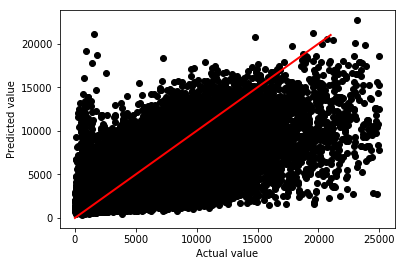

In [30]:
### visualize spread between predictions and target values

pred = np.zeros_like(y)
pred[:y.shape[0]] = [x for x in model.predict(X)]        # to visualize NN preds
# pred[:y.shape[0]] = ensemble_regressor(regressors, X)  # to visualize ensemble preds

fig, ax = plt.subplots()
ax.scatter(y, pred, c='k')
ax.plot([21000, 0], [21000, 0], 'r-', lw=2)
ax.set_xlabel('Actual value')
ax.set_ylabel('Predicted value')
plt.show()

In [39]:
ids = test["id"].values

# predictions = ensemble_regressor([regressors], test.drop(["id"], axis=1).as_matrix())                   # ensemble
# predictions = ensemble_regressor([model], test.drop(["id", "loss"], axis=1).as_matrix())                # neural net
predictions1 = ensemble_regressor([model], sel.transform(test.drop(["id", "loss"], axis=1).as_matrix()))   # w/ feat sel

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [40]:
predictions1

[1539.3794,
 1980.7634,
 9195.953,
 7082.517,
 1004.78754,
 2495.5886,
 2698.757,
 1037.1577,
 2654.3982,
 3582.4944,
 2841.2246,
 1149.8386,
 1518.2028,
 2670.6675,
 2364.7478,
 5278.667,
 2456.537,
 1846.4634,
 3175.3237,
 2622.6667,
 2127.7715,
 2091.207,
 1192.9629,
 1283.1086,
 1438.5035,
 1031.0825,
 5334.204,
 3530.234,
 1272.4904,
 2391.6716,
 2126.105,
 1697.8038,
 6373.8545,
 2889.352,
 3854.6387,
 4221.6973,
 3193.0813,
 4039.234,
 2182.5833,
 7919.811,
 1958.3971,
 5017.001,
 2552.722,
 1462.5399,
 1526.2462,
 5844.1064,
 2319.1357,
 1484.5135,
 1767.022,
 873.7499,
 2980.3813,
 5784.388,
 3212.389,
 1647.3717,
 1654.2617,
 3990.009,
 3806.9517,
 4426.631,
 2058.3179,
 1167.3934,
 5129.655,
 847.6721,
 1726.1902,
 1731.9623,
 3516.4038,
 1397.428,
 2810.8696,
 1215.5951,
 1641.9714,
 893.9099,
 10717.008,
 1400.4441,
 5011.7153,
 2183.9414,
 4155.387,
 3633.6328,
 1679.1548,
 4766.0103,
 1714.8317,
 3606.9556,
 5739.508,
 2531.4553,
 3869.6042,
 1315.4445,
 3521.3347,
 2984

In [41]:
# # w/ log loss
with open("prediction1.csv", "w") as f:
    p_writer = csv.writer(f, delimiter=',', lineterminator='\n')
    for i, p in enumerate(predictions):
        p_writer.writerow([ids[i], np.exp(p)])

In [42]:
# w/o log loss
with open("prediction1.csv", "w") as f:
    p_writer = csv.writer(f, delimiter=',', lineterminator='\n')
    for i, p in enumerate(predictions):
        p_writer.writerow([ids[i], p])